In [1]:
%matplotlib inline

import numpy as np
import pandas
from crn_utils import SimulationOptions
from matplotlib import pyplot as plt

In [2]:
def get_end_t(data):
    return data[data["isFinal"]][["volume", "time"]].groupby(["volume"]).mean().reset_index()

def get_correct(data):
    temp_data = data[data["isFinal"]][["volume", "X", "Y"]]
    temp_data["isCorrect"] = temp_data["X"].eq(0) & temp_data["Y"].eq(temp_data["volume"])
    temp_data = temp_data[["volume", "isCorrect"]]
    v_counts = temp_data.groupby(["volume"]).value_counts(normalize=True)
    v_counts = v_counts[v_counts.index.get_level_values(1)]
    return v_counts.index.get_level_values(0).values.tolist(), v_counts.values.tolist()

def get_firings(data):
    firings_by_volume = data.groupby(["volume"]).size()
    firings = firings_by_volume.values
    ntot_logntot = firings_by_volume.index.values*np.log(firings_by_volume.index.values)
    return ntot_logntot, firings

In [3]:
files = {"Double-B": "double-b.csv", "Heavy-B": "heavy-b.csv", "Single-B": "single-b.csv", "Tri-Molecular": "tri-molecular.csv"}
end_ts = {}
correctness = {}
firings = {}

for data_set in files.keys():
    d = SimulationOptions.read("./csvs/{}".format(files[data_set]), "csv")
    d["isFinal"] = d.time.eq(d.groupby(['volume','repeatNum']).time.transform('max'))
    end_ts[data_set] = get_end_t(d)
    correctness[data_set] = get_correct(d)
    firings[data_set] = get_firings(d)

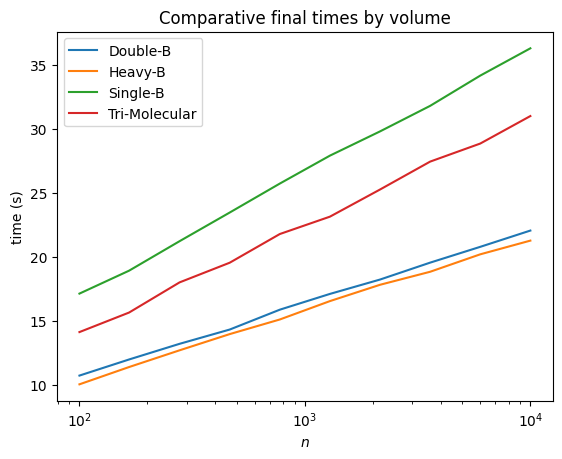

In [4]:
for key in end_ts.keys():
    plt.plot(end_ts[key]["volume"], end_ts[key]["time"], label=key)

plt.xlabel("$n$")
plt.ylabel("time (s)")
plt.xscale('log')
plt.title("Comparative final times by volume")
plt.legend()
plt.show()

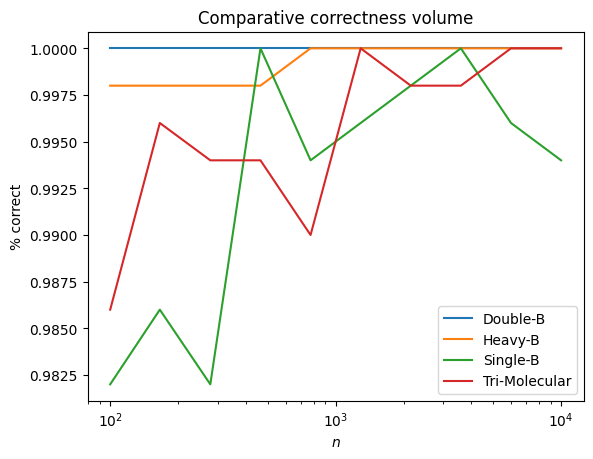

In [5]:
for key in correctness.keys():
    plt.plot(correctness[key][0], correctness[key][1], label=key)

plt.xlabel("$n$")
plt.ylabel("% correct")
plt.xscale('log')
plt.title("Comparative correctness volume")
plt.legend()
plt.show()

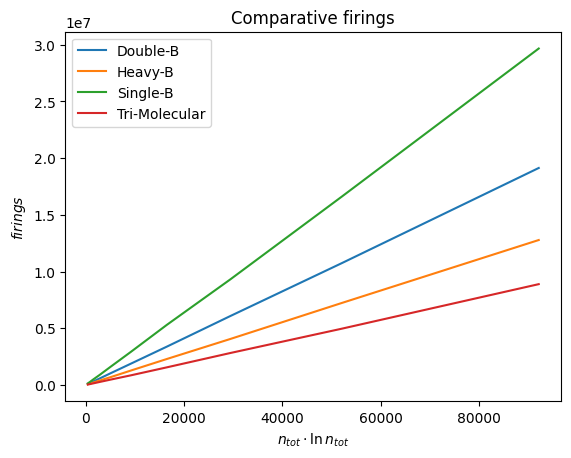

In [6]:
for key in firings.keys():
    plt.plot(firings[key][0], firings[key][1], label=key)

plt.xlabel("$n_{tot} \\cdot \\ln n_{tot}$")
plt.ylabel("$firings$")
plt.title("Comparative firings")
plt.legend()
plt.show()